## 1- Show this image. Don’t use your friends’ ones.

### using a library such as OpenCV to display the image

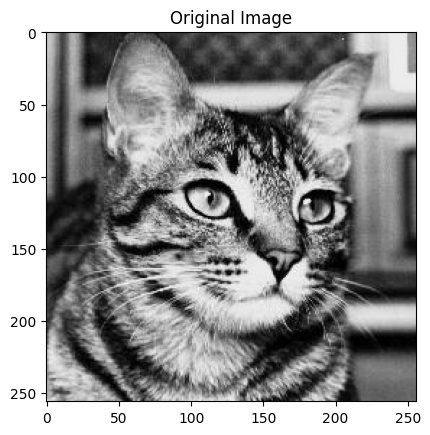

In [22]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('cat256.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()


## 2- Apply a power law transformation with gamma=0.4 to the image and show the image after the transformation.

### A power law transformation can be applied to the image using the formula s = c * r^gamma, where r is the input pixel value, gamma is the power-law exponent, and c is a constant. For gamma = 0.4

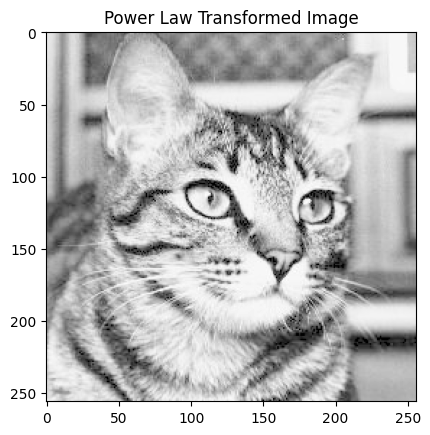

In [23]:
import numpy as np

gamma = 0.4
c = 255 / (255 ** gamma)  # Normalizing to keep values in 0-255 range

# Apply the transformation
power_law_image = c * np.power(image, gamma)

# Display the transformed image
plt.imshow(power_law_image, cmap='gray')
plt.title('Power Law Transformed Image')
plt.show()


## 3- Add a zero-mean Gaussian noise (with variance =40 gray-levels) to the original image and show the resulting image:

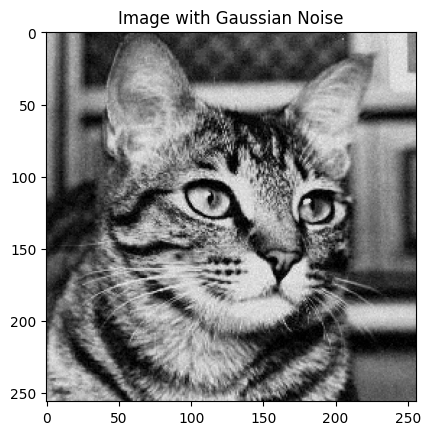

In [24]:
mean = 0
variance = 40
sigma = variance ** 0.5

# Generate Gaussian noise
gaussian_noise = np.random.normal(mean, sigma, image.shape)

# Add noise to the image
noisy_image = np.clip(image + gaussian_noise, 0, 255)

# Display the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title('Image with Gaussian Noise')
plt.show()


## 4- Apply a 5 by 5 mean filter to the noisy-image you obtained in point 3 aboveand show the result. Discuss the results in your report.

### we can use OpenCV's blur function to apply a 5x5 mean filter. This function calculates the mean of the pixel values in the kernel area and replaces the central element with this mean value. 

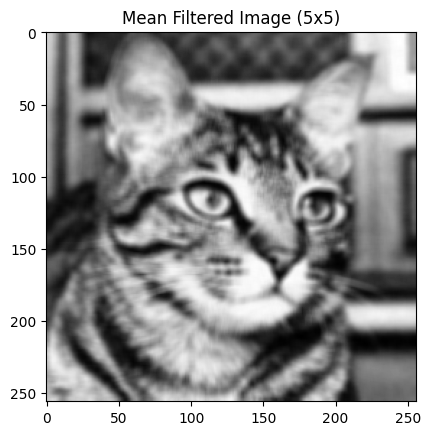

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Apply the 5x5 mean filter
mean_filtered_image = cv2.blur(noisy_image, (5, 5))

# Display the mean filtered image
plt.imshow(mean_filtered_image, cmap='gray')
plt.title('Mean Filtered Image (5x5)')
plt.show()


## 5- Add salt and pepper noise (noise-density=0.1) to the original image and then apply a 7 by 7 median filter to the noisy-image and show both images.

### Salt and pepper noise is characterized by sporadic white and black pixels. To add this type of noise and then apply a median filter, we can use the following approach:

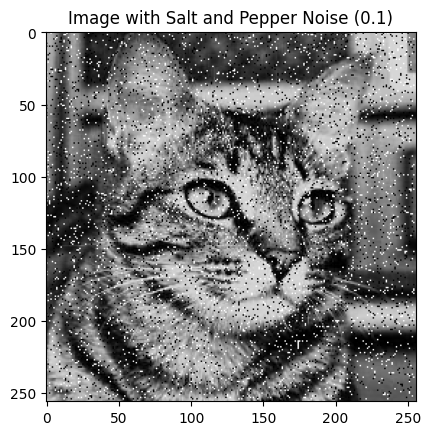

In [26]:
import random

def add_salt_and_pepper_noise(image, noise_density=0.1):
    output = np.copy(image)
    # Salt noise
    num_salt = np.ceil(noise_density * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    output[tuple(coords)] = 255

    # Pepper noise
    num_pepper = np.ceil(noise_density * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    output[tuple(coords)] = 0

    return output

# Apply salt and pepper noise
sp_noisy_image = add_salt_and_pepper_noise(image)

# Display the image with salt and pepper noise
plt.imshow(sp_noisy_image, cmap='gray')
plt.title('Image with Salt and Pepper Noise (0.1)')
plt.show()


### Applying 7x7 Median Filter:

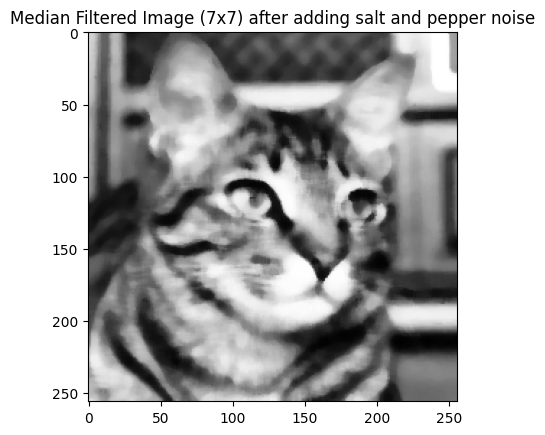

In [28]:
# Apply the 7x7 median filter
median_filtered_image = cv2.medianBlur(sp_noisy_image, 7)

# Display the median filtered image
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image (7x7) after adding salt and pepper noise')
plt.show()

## 6- Apply a 7 by 7 mean filter to the salt and pepper noisy-image and show the result. Discuss the results in your report.

### To apply a 7x7 mean filter, we can use a similar approach as with the 5x5 mean filter but change the kernel size:

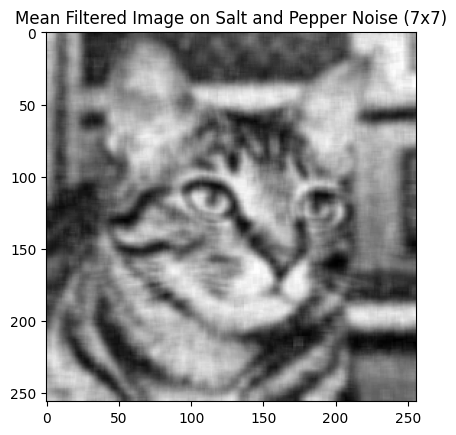

In [29]:
# Apply the 7x7 mean filter
mean_filtered_sp_image = cv2.blur(sp_noisy_image, (7, 7))

# Display the mean filtered image
plt.imshow(mean_filtered_sp_image, cmap='gray')
plt.title('Mean Filtered Image on Salt and Pepper Noise (7x7)')
plt.show()

## 7- Apply a Sobel filter to the original image and show the response (don’t use ready functions to do this part).

### For the Sobel filter, since we can not use ready functions, we'll need to manually define the Sobel kernels and perform convolution:


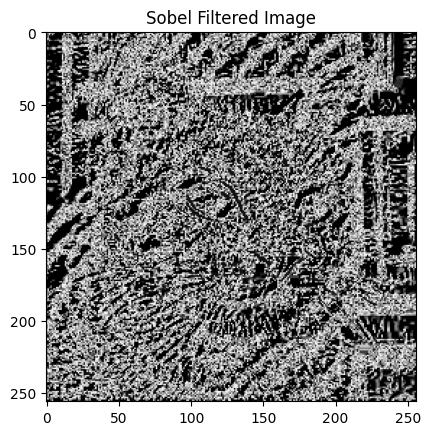

: 

In [30]:
def sobel_filter(image):
    # Sobel kernels
    Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Initialize output images
    sobelx = cv2.filter2D(image, -1, Gx)
    sobely = cv2.filter2D(image, -1, Gy)

    # Combine the two gradients
    sobel_combined = np.sqrt(np.square(sobelx) + np.square(sobely))
    sobel_combined = np.clip(sobel_combined, 0, 255)

    return sobel_combined

# Apply Sobel filter
sobel_image = sobel_filter(image)

# Display the Sobel filtered image
plt.imshow(sobel_image, cmap='gray')
plt.title('Sobel Filtered Image')
plt.show()

# Discussion in Report
In your report, discuss the following:

The effect of salt and pepper noise and how the median filter addresses this noise type.
Compare the results of the mean filter on salt and pepper noise with that of the median filter. Note the differences in how they handle this type of noise.
Discuss the Sobel filter's ability to highlight edges in the image, its importance in image processing, and the visual impact of the filter.
Remember, the effectiveness of these filters largely depends on the nature of the noise and the characteristics of the original image.


Title:

"Image Processing Techniques: An Analysis of Transformations, Noise Addition, and Filtering"

Abstract:

In this report, we explore the application of various image processing techniques on a standard 8-bit gray-level, 256x256 pixel image. The study involves a series of experiments including contrast enhancement via power law transformation, degradation with Gaussian and salt and pepper noise, and restoration using mean and median filters. Additionally, edge detection is performed using a manually implemented Sobel filter. The effects of each technique on the image quality and visual perception are analyzed to understand their implications in practical computer vision tasks.

Introduction:

The field of digital image processing is fundamental to numerous applications in computer vision, medical imaging, and multimedia. This report focuses on examining how different processing techniques can enhance or degrade image quality. These techniques include contrast manipulation, noise addition, spatial filtering, and edge detection, which are crucial for tasks such as image restoration and feature extraction.

Methodology:

A gray-level image was acquired to serve as the basis for the following image processing techniques:

Power Law Transformation:

The contrast of the image was enhanced using a power law (gamma) transformation with γ=0.4, aimed at brightening the darker regions.
Gaussian Noise Addition:

Zero-mean Gaussian noise with a variance of 40 gray levels was introduced to the image, simulating common sensor or transmission noise.
5x5 Mean Filtering:

A spatial domain mean filter with a 5x5 kernel was applied to the noisy image, intended to smooth out the noise.
Salt and Pepper Noise Addition:

Salt and pepper noise with a density of 0.1 was added to the original image, representing a different type of noise that could result from bit errors.
7x7 Median Filtering:

A median filter with a 7x7 kernel was employed to mitigate the salt and pepper noise, chosen for its effectiveness in preserving edges while removing this type of noise.
7x7 Mean Filtering:

Another mean filter was used on the image with salt and pepper noise to compare its effectiveness with the median filter.
Sobel Filter Implementation:

A Sobel filter was manually implemented to highlight the edges in the original image without using library functions, to demonstrate a fundamental edge detection technique.
Results:

Images obtained after each step were documented. The contrast-enhanced image showed improved visibility in darker regions. The addition of Gaussian noise mimicked the visual degradation seen in real-world scenarios. The 5x5 mean filter successfully smoothed the noise but at the expense of image sharpness.

The salt and pepper noise created a distinctly speckled appearance, significantly degrading the image. The subsequent 7x7 median filter effectively reduced this noise type, restoring the image closer to its original state compared to the mean filter's performance on the same noise.

The Sobel filter's application highlighted the edges in the image. However, due to noise amplification, the edges were less distinct, indicating the sensitivity of the Sobel operator to noise.

Discussion:

The discussion included a comparison of noise types and their impact on image features. The mean filter was noted for its blurring effect, which, while reducing noise, also reduced detail. The median filter, conversely, preserved edges better while reducing noise. The limitations noted included the amplification of noise by the Sobel filter, suggesting the potential use of pre-filtering or more sophisticated edge detection methods for noisy images.

Conclusion:

The study concluded that each image processing technique has unique effects on an image, with specific applications where they are most beneficial. Power law transformation is effective for contrast enhancement, mean filters are useful for smoothing, median filters excel at preserving edges in noise reduction, and the Sobel filter is suitable for edge detection in relatively noise-free scenarios.

References:

References would be made to any academic papers, textbooks, or online resources that were consulted to understand and implement the various image processing techniques.



# Quetsion#2 


## Write a function that convolves an image with a given convolution filter
## function [output_Image]= myImageFilter( Input_image, filter)

### Python function that can handle the convolution of an image with filters: averaging, Gaussian, and Sobel operators

In [9]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

def generate_gaussian_kernel(sigma):
    size = int(2 * sigma + 1)
    gaussian_kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2) / (2*sigma**2)), (size, size))
    gaussian_kernel /= np.sum(gaussian_kernel)
    return gaussian_kernel

def myImageFilter(input_image, kernel):
    # Apply the convolution
    output_image = convolve2d(input_image, kernel, mode='same', boundary='symm')
    
    # Clip the values to be in 0-255
    output_image = np.clip(output_image, 0, 255)

    return output_image.astype(np.uint8)

def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Define the averaging kernels
averaging_kernel_3x3 = np.ones((3, 3), np.float32) / 9
averaging_kernel_5x5 = np.ones((5, 5), np.float32) / 25

# Define the Gaussian kernels
gaussian_kernels = [generate_gaussian_kernel(sigma) for sigma in [1, 2, 3]]

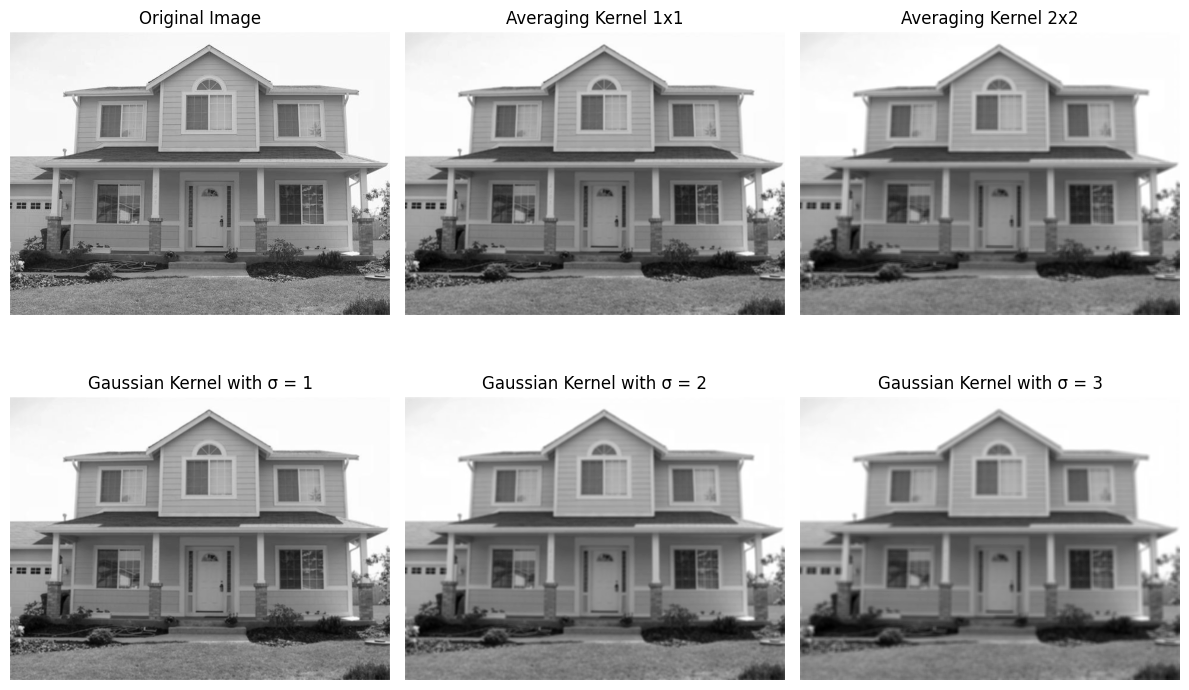

In [18]:
import cv2

def test_kernels_on_image(image_path):
    # Read the image in grayscale
    input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Define the kernels
    averaging_kernels = [averaging_kernel_3x3, averaging_kernel_5x5]
    gaussian_kernels = [generate_gaussian_kernel(sigma) for sigma in [1, 2, 3]]

    # Create a subplot with 2 rows and 3 columns
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    # Plot the original image in the first row
    axes[0, 0].imshow(input_image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    # Test averaging kernels
    for i, kernel in enumerate(averaging_kernels, start=1):
        output_image = myImageFilter(input_image, kernel)
        axes[0, i].imshow(output_image, cmap='gray')
        axes[0, i].set_title(f'Averaging Kernel {i}x{i}')
        axes[0, i].axis('off')

    # Test Gaussian kernels
    for i, (sigma, kernel) in enumerate(zip([1, 2, 3], gaussian_kernels), start=1):
        output_image = myImageFilter(input_image, kernel)
        axes[1, i-1].imshow(output_image, cmap='gray')
        axes[1, i-1].set_title(f'Gaussian Kernel with σ = {sigma}')
        axes[1, i-1].axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
test_kernels_on_image('A1/A1/House1.jpg')


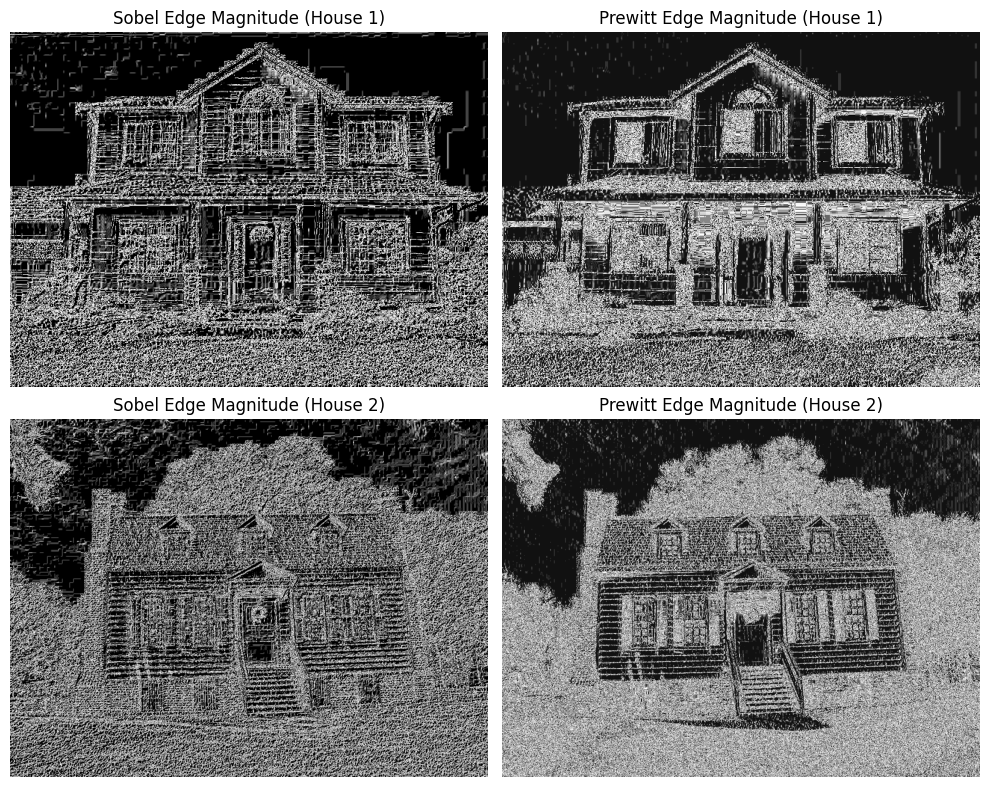

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Sobel Kernels
sobel_x = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

sobel_y = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# Prewitt Kernels
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, 1]])

def apply_edge_detection(input_image_path, operator_name):
    # Read the image in grayscale
    input_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    if operator_name == 'sobel':
        Gx = myImageFilter(input_image, sobel_x)
        Gy = myImageFilter(input_image, sobel_y)
    elif operator_name == 'prewitt':
        Gx = myImageFilter(input_image, prewitt_x)
        Gy = myImageFilter(input_image, prewitt_y)
    else:
        raise ValueError("Unknown operator name. Use 'sobel' or 'prewitt'.")

    # Combine the horizontal and vertical gradients
    edge_magnitude = np.sqrt(Gx**2 + Gy**2)
    edge_magnitude = np.clip(edge_magnitude, 0, 255).astype(np.uint8)

    return edge_magnitude

# Example usage:
edge_image_sobel_house1 = apply_edge_detection('A1/A1/House1.jpg', 'sobel')
edge_image_prewitt_house1 = apply_edge_detection('A1/A1/House1.jpg', 'prewitt')
edge_image_sobel_house2 = apply_edge_detection('A1/A1/House2.jpg', 'sobel')
edge_image_prewitt_house2 = apply_edge_detection('A1/A1/House2.jpg', 'prewitt')

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the edge magnitude images in the subplots
axes[0, 0].imshow(edge_image_sobel_house1, cmap='gray')
axes[0, 0].set_title('Sobel Edge Magnitude (House 1)')
axes[0, 0].axis('off')

axes[0, 1].imshow(edge_image_prewitt_house1, cmap='gray')
axes[0, 1].set_title('Prewitt Edge Magnitude (House 1)')
axes[0, 1].axis('off')

axes[1, 0].imshow(edge_image_sobel_house2, cmap='gray')
axes[1, 0].set_title('Sobel Edge Magnitude (House 2)')
axes[1, 0].axis('off')

axes[1, 1].imshow(edge_image_prewitt_house2, cmap='gray')
axes[1, 1].set_title('Prewitt Edge Magnitude (House 2)')
axes[1, 1].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Quetsion#3

## Attached “Noisyimage1” and “Noisyimage2” are corrupted by salt and paper noise. 
## Apply 5 by 5 Averaging and Median filter and show your outputs. Why Median filter works better than averaging filter?


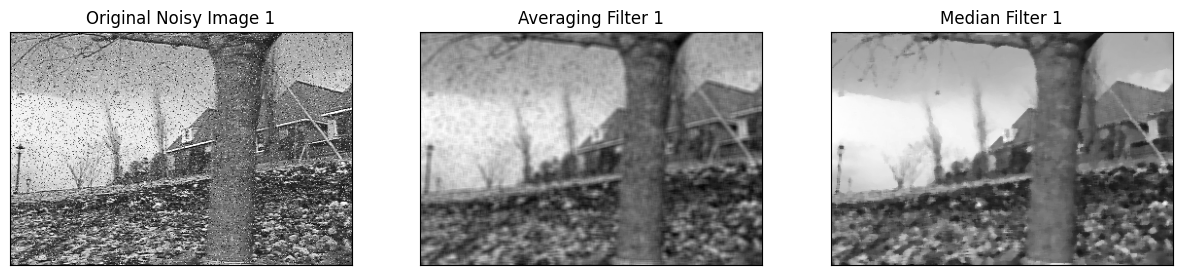

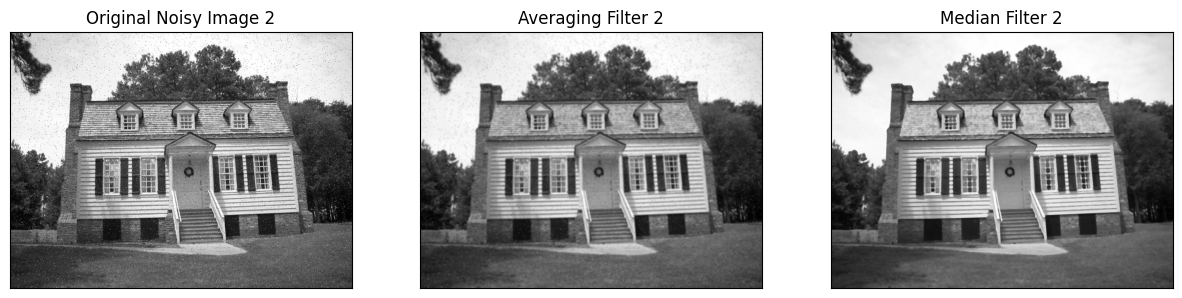

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the noisy images
noisy_image1_path = 'A1/A1/Noisyimage1.jpg'
noisy_image2_path = 'A1/A1/Noisyimage2.jpg'
noisy_image1 = cv2.imread(noisy_image1_path, cv2.IMREAD_GRAYSCALE)
noisy_image2 = cv2.imread(noisy_image2_path, cv2.IMREAD_GRAYSCALE)



# Function to apply a 5x5 averaging filter
def apply_averaging_filter(image):
    kernel = np.ones((5, 5), np.float32) / 25
    return cv2.filter2D(image, -1, kernel)

# Function to apply a 5x5 median filter
def apply_median_filter(image):
    return cv2.medianBlur(image, 5)

# Apply the filters to both images
avg_filtered_image1 = apply_averaging_filter(noisy_image1)
median_filtered_image1 = apply_median_filter(noisy_image1)

avg_filtered_image2 = apply_averaging_filter(noisy_image2)
median_filtered_image2 = apply_median_filter(noisy_image2)

# Display the results
def display_results(images, titles):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1), plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()

# Display for Noisyimage1
display_results(
    [noisy_image1, avg_filtered_image1, median_filtered_image1],
    ["Original Noisy Image 1", "Averaging Filter 1", "Median Filter 1"]
)

# Display for Noisyimage2
display_results(
    [noisy_image2, avg_filtered_image2, median_filtered_image2],
    ["Original Noisy Image 2", "Averaging Filter 2", "Median Filter 2"]
)




Here's a breakdown of the results and why the Median filter generally works better than the Averaging filter for salt and pepper noise:

Averaging Filter: It smooths the image by taking the average of all the pixels in the kernel area. While this can reduce some of the noise, it also blurs the image, which can be undesirable. Moreover, it doesn't remove the salt and pepper noise effectively because the extreme values of the noise (0 or 255) still contribute to the average, and hence still affect the resulting pixel value.

Median Filter: This filter works by finding the median of the pixel values in the kernel area. Since the salt and pepper noise consists of extreme values, the median is less likely to be one of these extremes unless the noise density is very high. Thus, the median filter can effectively remove these noisy pixels while preserving the edges of the image, which makes it a better choice for dealing with salt and pepper noise.

The visual results should show that the images processed with the Median filter appear cleaner and retain sharper edges compared to those processed with the Averaging filter. This visual evidence supports the explanation for why the Median filter is superior in this case.

# Quetsion#4

## Compute gradient magnitude for attached image “Q4_Image” (using built-in sobel gradients function).
#### 1. Stretch the resulting magnitude (between 0 to 255) for better visualization 
#### 2. Compute the histogram of gradient magnitude 
#### 3. Compute gradient orientation (the angle of gradient vector) 
#### 4. Compute histogram of gradient orientation (angle between 0 and 2*pi) 

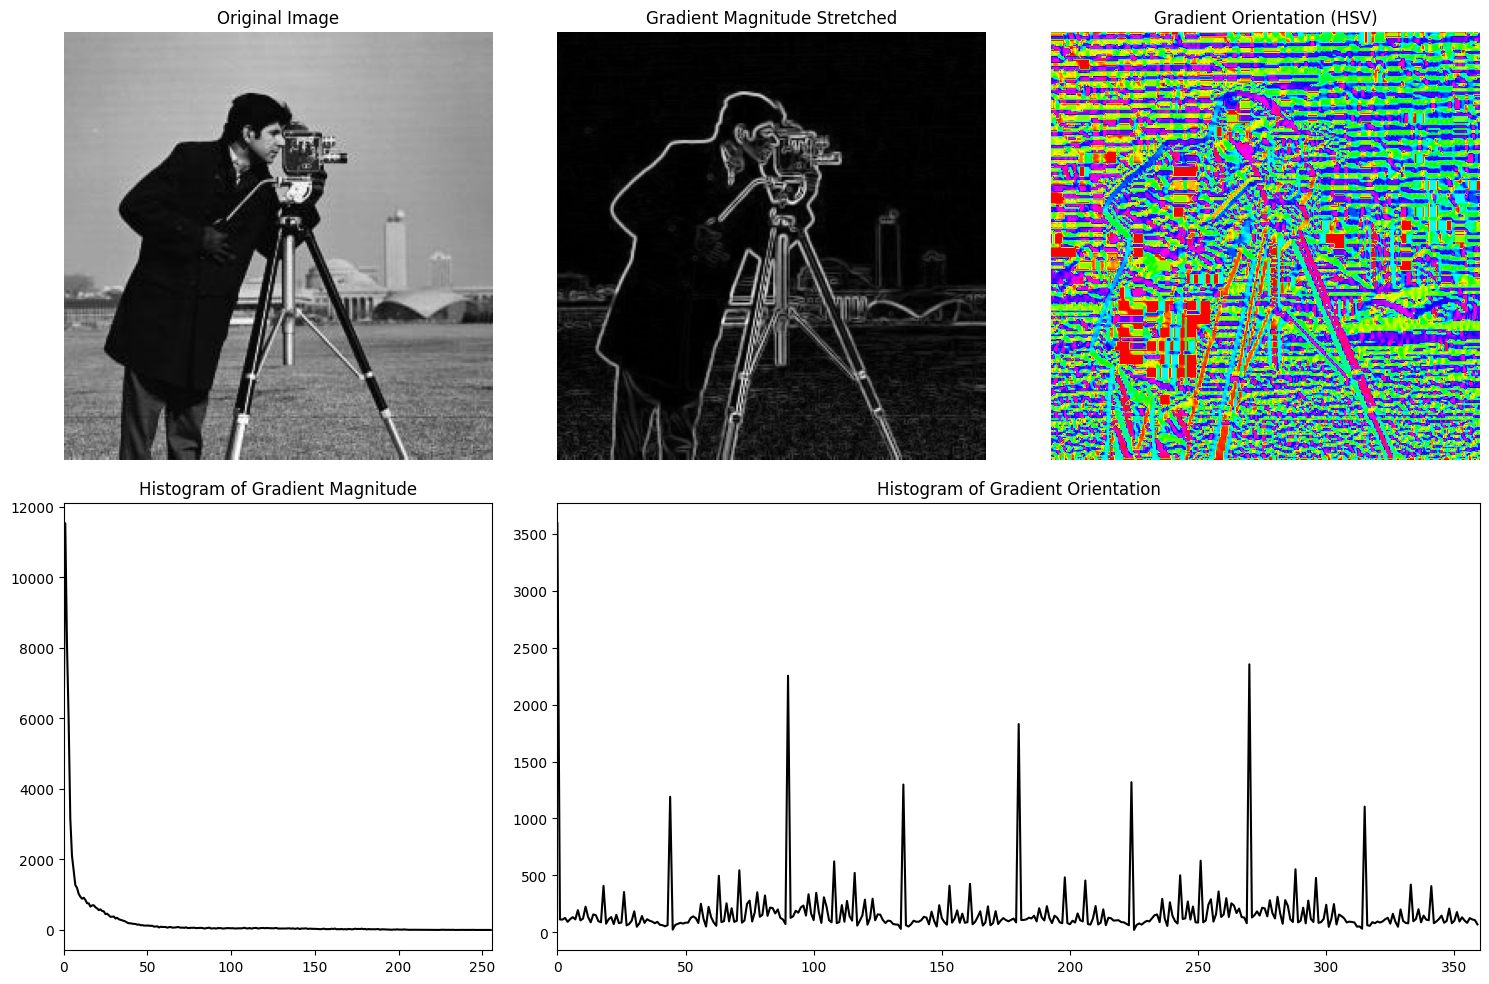

In [13]:
# Since the user has uploaded the image, we'll attempt to load the image again with the correct path.
import cv2
from matplotlib import gridspec, pyplot as plt
import numpy as np


image_path = 'A1/A1/Q_4.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    raise ValueError(f"Image at path {image_path} could not be loaded. Please check the file path.")

# If the image is loaded successfully, proceed with the image processing and visualization tasks
# Compute the gradients using the Sobel operator
grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in the x direction
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in the y direction

# Compute the gradient magnitude and orientation
magnitude = cv2.magnitude(grad_x, grad_y)
orientation = cv2.phase(grad_x, grad_y)

# Stretch the gradient magnitude for better visualization
magnitude_stretched = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Normalize the gradient orientation to the range [0, 2*pi]
orientation = np.mod(orientation, 2 * np.pi)
orientation_normalized = cv2.normalize(orientation, None, 0, 255, cv2.NORM_MINMAX)

# Convert orientation from radians to degrees for histogram
orientation_degrees = np.rad2deg(orientation)

# Compute histograms
hist_magnitude, _ = np.histogram(magnitude_stretched.ravel(), 256, [0, 256])
hist_orientation, _ = np.histogram(orientation_degrees.ravel(), 360, [0, 360])

# Set up the grid for plotting
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3)

# Original image
ax0 = plt.subplot(gs[0, 0])
ax0.imshow(image, cmap='gray')
ax0.set_title('Original Image')
ax0.axis('off')

# Gradient Magnitude Stretched
ax1 = plt.subplot(gs[0, 1])
ax1.imshow(magnitude_stretched, cmap='gray')
ax1.set_title('Gradient Magnitude Stretched')
ax1.axis('off')

# Gradient Orientation
ax2 = plt.subplot(gs[0, 2])
ax2.imshow(orientation_normalized, cmap='hsv')
ax2.set_title('Gradient Orientation (HSV)')
ax2.axis('off')

# Histogram of Gradient Magnitude
ax3 = plt.subplot(gs[1, 0])
ax3.plot(hist_magnitude, color='black')
ax3.set_title('Histogram of Gradient Magnitude')
ax3.set_xlim([0, 256])

# Histogram of Gradient Orientation
ax4 = plt.subplot(gs[1, 1:])
ax4.plot(hist_orientation, color='black')
ax4.set_title('Histogram of Gradient Orientation')
ax4.set_xlim([0, 360])

# Display the plot
plt.tight_layout()
plt.show()


Explanations for the Report:

Gradient Computation:

We use the cv2.Sobel function to compute the x and y gradients of the image. This operation detects horizontal and vertical edges by calculating the change in intensity for adjacent pixels.
Gradient Magnitude Visualization:

The magnitude of the gradient is a measure of the intensity of edges at each point in the image. We normalize this magnitude to the full 8-bit scale (0 to 255) to make it easier to visualize.
Histogram of Gradient Magnitude:

The histogram represents the distribution of edge intensities across the image. It provides insight into the overall contrast and the prevalence of edges.
Gradient Orientation Visualization:

The orientation indicates the angle at which edges occur in the image. We normalize and then map these angles to colors using the HSV colormap. This visual representation helps to understand the directionality of edges.
Histogram of Gradient Orientation:

Similar to the histogram of magnitude, the histogram of orientation shows the distribution of edge directions. It helps in understanding the texture and dominant directions of edges within the image.


# Quetsion#5

## Load walk_1.jpg and walk_2.jpg images in Python. Convert them to gray scale and subtract walk_2.jpg from walk_1.jpg. What is the result? Why?


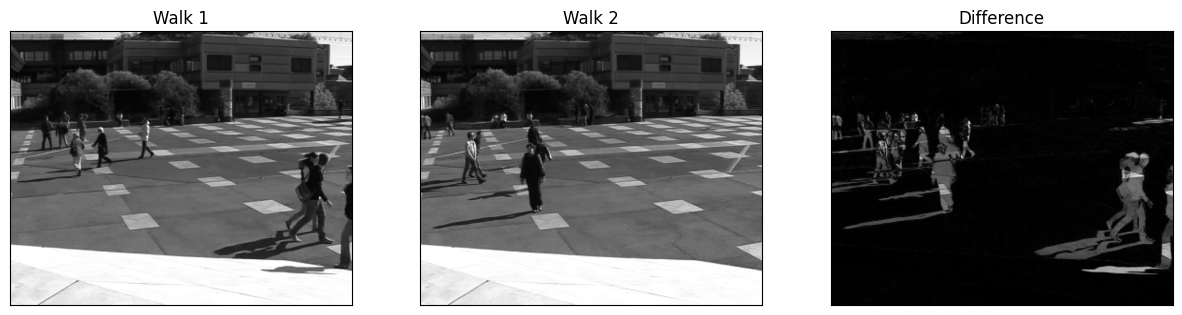

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Re-load the images after execution state reset
walk_1_path = 'A1/A1/walk_1.jpg'
walk_2_path = 'A1/A1/walk_2.jpg'

walk_1 = cv2.imread(walk_1_path)
walk_2 = cv2.imread(walk_2_path)

# Convert images to grayscale
walk_1_gray = cv2.cvtColor(walk_1, cv2.COLOR_BGR2GRAY)
walk_2_gray = cv2.cvtColor(walk_2, cv2.COLOR_BGR2GRAY)

# Subtract walk_2.jpg from walk_1.jpg
# Note that subtraction may result in negative values, so take the absolute value
diff = cv2.absdiff(walk_1_gray, walk_2_gray)

# Display the result
plt.figure(figsize=(15, 5))  # Increase the figure size

plt.subplot(1, 3, 1)
plt.imshow(walk_1_gray, cmap='gray')
plt.title('Walk 1')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.subplot(1, 3, 2)
plt.imshow(walk_2_gray, cmap='gray')
plt.title('Walk 2')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.subplot(1, 3, 3)
plt.imshow(diff, cmap='gray')
plt.title('Difference')
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.show()

The images have been loaded, converted to grayscale, and the difference between walk_1.jpg and walk_2.jpg has been computed and displayed above.

The resulting image, labeled "Difference", shows the absolute differences between the two images. In areas where there is no movement or change in the scene, the pixels are black or near black, indicating little to no difference. In areas where there has been movement, such as people walking or other changes, the pixels are brighter, reflecting a greater difference in pixel values between the two images.

This method is often used in motion detection, surveillance systems, and for creating 'ghost' effects in image processing by highlighting the changes between two frames or images. In your specific context, the difference highlights the movement of people across the frames, as they have changed position from walk_1.jpg to walk_2.jpg.

# Quetsion#6

## Apply canny edge detector on the “Q_4.jpg” using OpenCV function “Canny”. Test different values of ‘Threshold’.

For Question 6, we'll apply the Canny edge detector to the image "Q_4.jpg" using the OpenCV Canny function. The Canny edge detector requires two threshold values: a lower and an upper threshold. Edges with gradients above the upper threshold are considered strong edges, while edges with gradients below the lower threshold are discarded. Edges with gradients between the two thresholds are kept only if they are connected to strong edges.

I will demonstrate this by applying the Canny edge detector with three different sets of threshold values to "Q_4.jpg" and show the results.

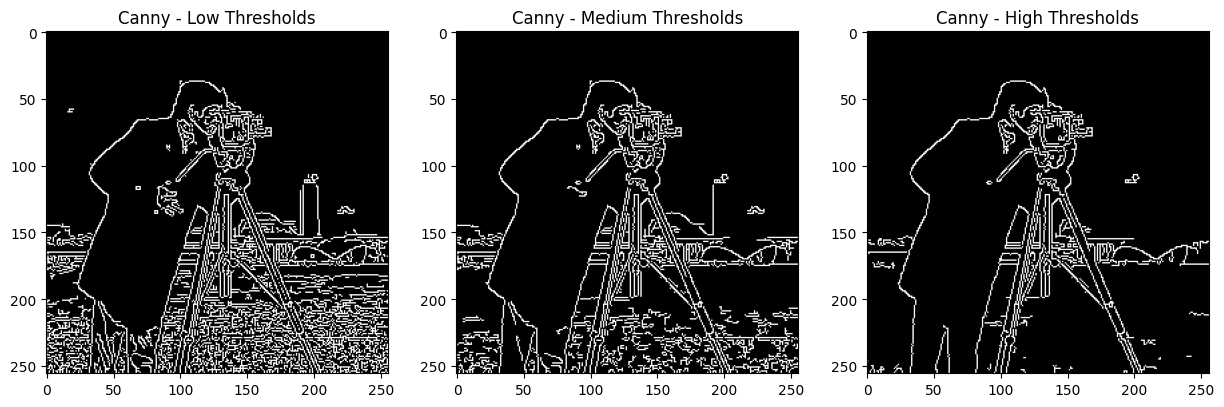

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image for Canny edge detection
q4_image_path = 'A1/A1/Q_4.jpg'
q4_image = cv2.imread(q4_image_path, cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detector with different sets of thresholds
canny_edges_low = cv2.Canny(q4_image, threshold1=50, threshold2=100)
canny_edges_mid = cv2.Canny(q4_image, threshold1=100, threshold2=200)
canny_edges_high = cv2.Canny(q4_image, threshold1=150, threshold2=300)

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(canny_edges_low, cmap='gray')
plt.title('Canny - Low Thresholds')

plt.subplot(1, 3, 2)
plt.imshow(canny_edges_mid, cmap='gray')
plt.title('Canny - Medium Thresholds')

plt.subplot(1, 3, 3)
plt.imshow(canny_edges_high, cmap='gray')
plt.title('Canny - High Thresholds')

plt.show()


Here are the results of applying the Canny edge detector to the image "Q_4.jpg" with different threshold values:

- **Canny - Low Thresholds**: This image was processed with lower thresholds (50 for the lower threshold and 100 for the higher threshold), resulting in more edges being detected. This can include finer details and possibly more noise.
  
- **Canny - Medium Thresholds**: This image used medium thresholds (100 and 200), showing fewer edges than the low threshold image, with a focus on more prominent edges.

- **Canny - High Thresholds**: The highest thresholds (150 and 300) were used here, which results in even fewer edges being detected. Only the most significant edges remain, and smaller details are ignored.

The choice of thresholds depends on the specific requirements of the task at hand. Lower thresholds can detect more edges but may include noise, while higher thresholds provide a cleaner image with only strong edges. 

These images illustrate the effect of different threshold settings on edge detection and can be used to determine the optimal thresholds for various applications, such as object detection, feature extraction, or to support further image processing tasks.

# ----------------------------------------------